Задание 1


In [1]:
import sympy as sp

# Определим переменные
x, a, b = sp.symbols('x a b', real=True)
f = 1/x

# Функция ошибки
phi = a + b*x
I = sp.integrate((f - phi)**2, (x, 1, 2))

# Условия минимума (∂I/∂a = 0, ∂I/∂b = 0)
dI_da = sp.diff(I, a)
dI_db = sp.diff(I, b)

# Решаем систему уравнений
solution = sp.solve([dI_da, dI_db], (a, b))
a_opt, b_opt = solution[a], solution[b]

# Строим итоговую аппроксимирующую функцию
phi_best = a_opt + b_opt * x

print("a =", sp.simplify(a_opt))
print("b =", sp.simplify(b_opt))
print("Лучшая линейная аппроксимация φ(x) =", sp.simplify(phi_best))


a = -18 + log(268435456)
b = 12 - log(262144)
Лучшая линейная аппроксимация φ(x) = 12*x + log(2**(28 - 18*x)) - 18


a = 1.408121
b = -0.476649


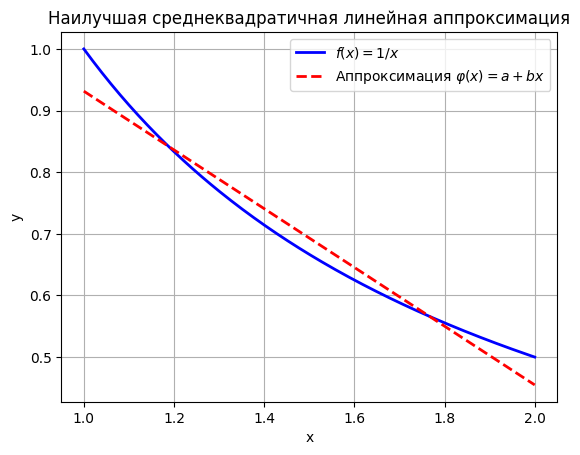

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Определим символы и функцию
x, a, b = sp.symbols('x a b', real=True)
f = 1/x
phi = a + b*x

# Интеграл ошибки
I = sp.integrate((f - phi)**2, (x, 1, 2))

# Условия минимума (∂I/∂a = 0, ∂I/∂b = 0)
dI_da = sp.diff(I, a)
dI_db = sp.diff(I, b)

# Решаем систему
solution = sp.solve([dI_da, dI_db], (a, b))
a_opt, b_opt = float(solution[a]), float(solution[b])

print(f"a = {a_opt:.6f}")
print(f"b = {b_opt:.6f}")

# Строим аппроксимирующую функцию
phi_best = lambda x: a_opt + b_opt*x
f_true = lambda x: 1/x

# Построение графика
x_vals = np.linspace(1, 2, 200)
plt.plot(x_vals, f_true(x_vals), label=r'$f(x)=1/x$', color='blue', linewidth=2)
plt.plot(x_vals, phi_best(x_vals), label=r'Аппроксимация $\varphi(x)=a+bx$', color='red', linestyle='--', linewidth=2)

plt.title('Наилучшая среднеквадратичная линейная аппроксимация')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Задание 2


=== (б) (x - 1910)^n ===
Степень N=2: прогноз 2010 = 312,470,336 | MSE=8.49e+12 | Ошибка прогноза=3,724,798
Степень N=3: прогноз 2010 = 309,020,979 | MSE=7.99e+12 | Ошибка прогноза=275,441
Степень N=4: прогноз 2010 = 305,706,175 | MSE=7.84e+12 | Ошибка прогноза=3,039,363
Степень N=5: прогноз 2010 = 340,607,732 | MSE=3.19e+12 | Ошибка прогноза=31,862,194


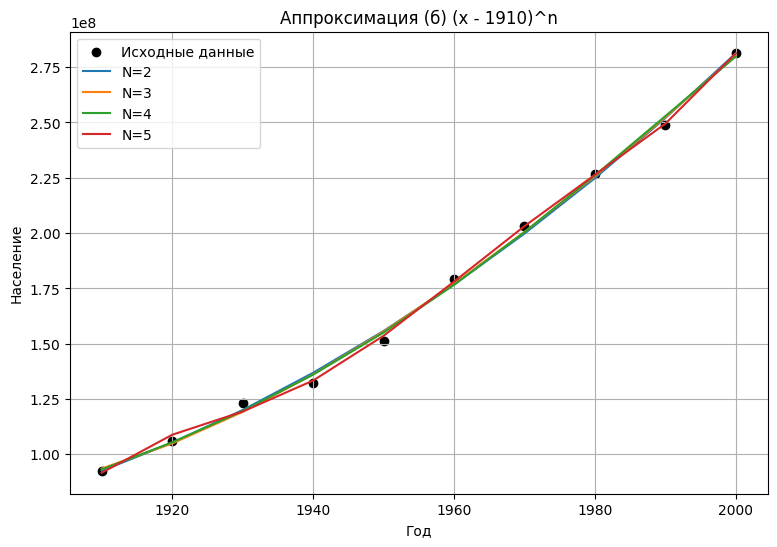

Лучшая модель (б) (x - 1910)^n: N=5, MSE=3.19e+12, прогноз 2010=340,607,732

=== (в) (x - 1955)^n ===
Степень N=2: прогноз 2010 = 312,470,336 | MSE=8.49e+12 | Ошибка прогноза=3,724,798
Степень N=3: прогноз 2010 = 309,020,979 | MSE=7.99e+12 | Ошибка прогноза=275,441
Степень N=4: прогноз 2010 = 305,706,176 | MSE=7.84e+12 | Ошибка прогноза=3,039,362
Степень N=5: прогноз 2010 = 340,607,732 | MSE=3.19e+12 | Ошибка прогноза=31,862,194


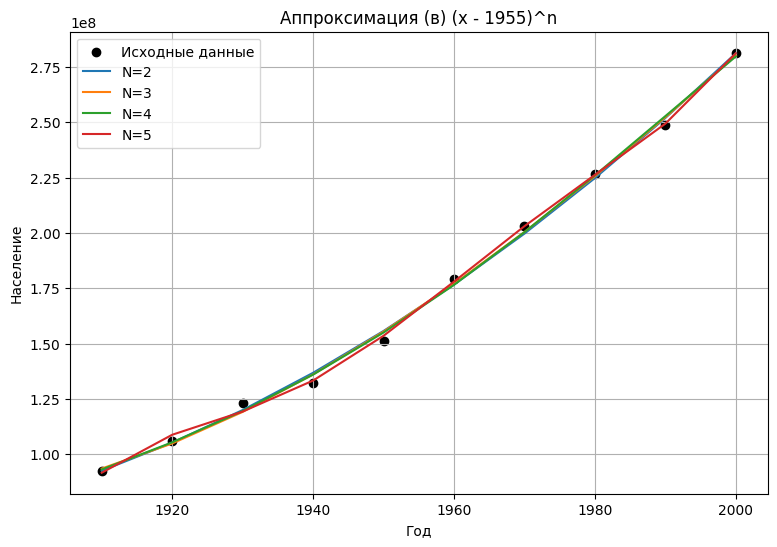

Лучшая модель (в) (x - 1955)^n: N=5, MSE=3.19e+12, прогноз 2010=340,607,732

Точное значение для 2010 года: 308,745,538


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Исходные данные
years = np.array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
population = np.array([
    92228496, 106021537, 123202624, 132164569,
    151325798, 179323175, 203211926, 226545805,
    248709873, 281421906
])

actual_2010 = 308_745_538  # точное значение для 2010 года

# === Функция для аппроксимации и оценки ===
def poly_fit_predict(x, y, shift, N_values, title):
    x_shifted = x - shift
    plt.figure(figsize=(9,6))
    plt.scatter(x, y, color='black', label='Исходные данные')

    print(f"\n=== {title} ===")
    results = []

    for N in N_values:
        # Аппроксимация МНК
        p = Polynomial.fit(x_shifted, y, N)
        y_pred = p(x_shifted)

        # Ошибка аппроксимации (среднеквадратичная)
        mse = np.mean((y - y_pred)**2)

        # Прогноз на 2010 год
        y_2010 = float(p(2010 - shift))
        err_2010 = abs(y_2010 - actual_2010)

        results.append((N, y_2010, mse, err_2010))
        plt.plot(x, y_pred, label=f'N={N}')

        print(f"Степень N={N}: прогноз 2010 = {y_2010:,.0f} "
              f"| MSE={mse:,.2e} | Ошибка прогноза={err_2010:,.0f}")

    plt.title(f"Аппроксимация {title}")
    plt.xlabel("Год")
    plt.ylabel("Население")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Определим наилучшую модель по MSE
    best = min(results, key=lambda r: r[2])
    print(f"Лучшая модель {title}: N={best[0]}, MSE={best[2]:.2e}, прогноз 2010={best[1]:,.0f}")

# === Пункт (б): f(x) ≈ Σ c_n (x - 1910)^n ===
poly_fit_predict(years, population, shift=1910, N_values=[2,3,4,5], title="(б) (x - 1910)^n")

# === Пункт (в): f(x) ≈ Σ c_n (x - 1955)^n ===
poly_fit_predict(years, population, shift=1955, N_values=[2,3,4,5], title="(в) (x - 1955)^n")

print(f"\nТочное значение для 2010 года: {actual_2010:,}")
